In [1]:
# Load libraries
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA , IncrementalPCA

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_curve, auc

import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.model_selection import GridSearchCV

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import seaborn as sns
from sklearn.model_selection import StratifiedKFold

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore")

### Read Data

In [2]:
data = pd.read_csv("train.csv")

print('Dataframe Shape: ', data.shape); print('-'*80, '\n');
print("Dataframe Info: \n"); data.info(verbose=True); print('-'*80, '\n')
data.head(5)

Dataframe Shape:  (69999, 172)
-------------------------------------------------------------------------------- 

Dataframe Info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float6

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,Na

### Data Analysis

### Identify columns that have no variance

In [3]:
data.dropna(how='all',inplace=True)

In [4]:
# Find columns with all same entries
data_unique_count_is_one=data.columns[data.nunique()==1]

In [5]:
data_unique_count_is_one

Index(['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8'],
      dtype='object')

In [6]:
data.drop(data_unique_count_is_one,axis=1,inplace=True)

In [7]:
data.shape

(69999, 159)

### Check for Missing values

In [8]:
# Check how many rows have all missing values
print("Rows with all NULL values =",  data.isnull().all(axis=1).sum())

Rows with all NULL values = 0


In [9]:
def getMissingValues(missingCutoff):
    # Function to retun the columns with more than missingCutoff% missing values.
    missing = round(100*(data.isnull().sum()/data.shape[0]))
    print("There are {} features having more than {}% missing values/entries".format(len(missing.loc[missing > missingCutoff]),missingCutoff))
    return missing.loc[missing > missingCutoff]

In [10]:
def imputeNan(data, imputeColList=False, missingColList=False):
    # Function impute the nan with 0
    if imputeColList:
        for col in [y + s for s in ['_6','_7','_8'] for y in imputeColList]:
            data[col].fillna(0, inplace=True)
    else:    
        for col in missingColList:
            data[col].fillna(0, inplace=True)

In [11]:
# Missing values per column expressed as % of total number of values
high_missing_cols=getMissingValues(50)

There are 30 features having more than 50% missing values/entries


In [12]:
high_missing_cols.index

Index(['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7',
       'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7',
       'count_rech_3g_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8',
       'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6',
       'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7',
       'fb_user_8'],
      dtype='object')

In [13]:
#data.drop(high_missing_cols.index,axis=1,inplace=True)

In [14]:
data.shape

(69999, 159)

In [15]:
data.shape

(69999, 159)

In [16]:
#date_vars = ["date_of_last_rech_6", "date_of_last_rech_7", "date_of_last_rech_8"]
date_vars=["date_of_last_rech_data_6", 'date_of_last_rech_data_7','date_of_last_rech_data_8',"date_of_last_rech_6", "date_of_last_rech_7", "date_of_last_rech_8"]

data.drop(date_vars, axis=1, inplace=True)

In [17]:
data.columns[data.nunique()==2]

Index(['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6',
       'fb_user_7', 'fb_user_8', 'churn_probability'],
      dtype='object')

In [18]:
data.shape

(69999, 153)

In [19]:
data.drop("id", axis=1, inplace=True)

In [20]:
data.shape

(69999, 152)

In [21]:
missing_val_all=getMissingValues(0)

There are 108 features having more than 0% missing values/entries


In [22]:
len(missing_val_all.index[(missing_val_all<50)])

81

In [23]:
missing_cols_low=missing_val_all.index[(missing_val_all<50)]
missing_cols_low

Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
       'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6',
       'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7',
       'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8',
       'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6',
       'og_others_7', 'og_others_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7',
       'lo

In [24]:
missing_cols_high=missing_val_all.index[(missing_val_all>=50)]
missing_cols_high

Index(['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
       'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8',
       'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
       'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
       'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7',
       'arpu_2g_8', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8',
       'fb_user_6', 'fb_user_7', 'fb_user_8'],
      dtype='object')

## Modelling Start

In [25]:
X = data[data.columns[~data.columns.isin(['churn_probability'])]]
Y = data['churn_probability']
numeric_cols=X.columns[X.nunique()!=2]


In [26]:
zero_impute=1


In [27]:
orig_cols=X.columns
if zero_impute==0:
    orig_cols=X.columns    
    simple_imtr = SimpleImputer(strategy='median')
    #simple_imtr = KNNImputer(n_neighbors=5)
    X = pd.DataFrame(simple_imtr.fit_transform(X))
    X.columns=orig_cols
else :
    X=X.fillna(0)

In [28]:
orig_columns=X.columns
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
X_std= pd.DataFrame(X_std)
X_std.columns=orig_columns
X_std.shape

(69999, 151)

In [29]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_std,Y, train_size=0.7,test_size=0.3,random_state=42)

In [30]:
X_train.columns

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'fb_user_6', 'fb_user_7',
       'fb_user_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g'],
      dtype='object', length=151)

In [31]:
print("Training dataset size",X_train.shape)
print("Training dataset target size",y_train.shape)
print("Test dataset size",X_test.shape)
print("Test dataset target size",y_test.shape)

Training dataset size (48999, 151)
Training dataset target size (48999,)
Test dataset size (21000, 151)
Test dataset target size (21000,)


In [32]:
print("Data imbalance, counts of label '1': {}".format(sum(y_train==1)))
print("Data imbalance, counts of label '0': {} \n".format(sum(y_train==0)))

Data imbalance, counts of label '1': 4977
Data imbalance, counts of label '0': 44022 



### Using SMOTE to correct data imbalance
## class weights giving better results - using class weights

In [33]:
X_train.shape

(48999, 151)

In [34]:
#sm = SMOTE(random_state=42)
#X_train_smote, y_train_smote= sm.fit_resample(X_train, y_train)

#over = SMOTE(sampling_strategy=1,random_state=42)
#under = RandomUnderSampler(sampling_strategy=1,random_state=42)

#steps = [('o', over), ('u', under)]
#pipeline = Pipeline(steps=steps)
# transform the dataset
#X_train_smote, y_train_smote = pipeline.fit_resample(X_train, y_train)



count_class_1 = y_train.value_counts()[0]
count_class_2 = y_train.value_counts()[1]
ratio = count_class_1/count_class_2


print("Counts of label '1': {}".format(sum(y_train==1)))
print("Counts of label '0': {}".format(sum(y_train==0)))
print(ratio)

Counts of label '1': 4977
Counts of label '0': 44022
8.845087402049428


## PCA Start

In [35]:
# PCA object with default parameter
pca = PCA(random_state=42)

In [37]:
#Doing PCA on the train data
pca.fit(X_train)

PCA(random_state=42)

In [38]:
print(pca.components_)
print('-'*80, '\n');
print(pca.explained_variance_ratio_)
print('-'*80, '\n');
print(pca.explained_variance_ratio_.cumsum())

[[ 1.44571589e-01  1.49149414e-01  1.42842994e-01 ...  1.13772229e-01
   1.12413117e-01  1.08354382e-01]
 [-9.30100964e-02 -9.78321366e-02 -9.14667889e-02 ...  8.70320799e-02
   8.88432527e-02  8.69537836e-02]
 [-4.93399031e-02 -6.41907129e-02 -5.57599281e-02 ...  4.70210603e-03
   4.64914522e-03  5.41413945e-03]
 ...
 [-0.00000000e+00  1.59679783e-16 -2.70948812e-16 ...  3.35397544e-17
   6.81040029e-18  2.86944773e-17]
 [-0.00000000e+00 -7.84696217e-17 -5.82074081e-17 ...  1.87690083e-17
  -1.21073278e-17 -7.28609474e-18]
 [ 0.00000000e+00  1.19490215e-16  4.66255895e-17 ...  6.13140384e-17
  -1.10393565e-16  4.97007597e-17]]
-------------------------------------------------------------------------------- 

[1.25103373e-01 9.36493029e-02 6.32634418e-02 5.01445589e-02
 3.72755761e-02 2.99437970e-02 2.71103102e-02 2.45392950e-02
 2.20554678e-02 2.12574294e-02 2.07470455e-02 2.03350538e-02
 1.97295880e-02 1.71930469e-02 1.66911323e-02 1.60831003e-02
 1.48939201e-02 1.46644380e-02 1.4302

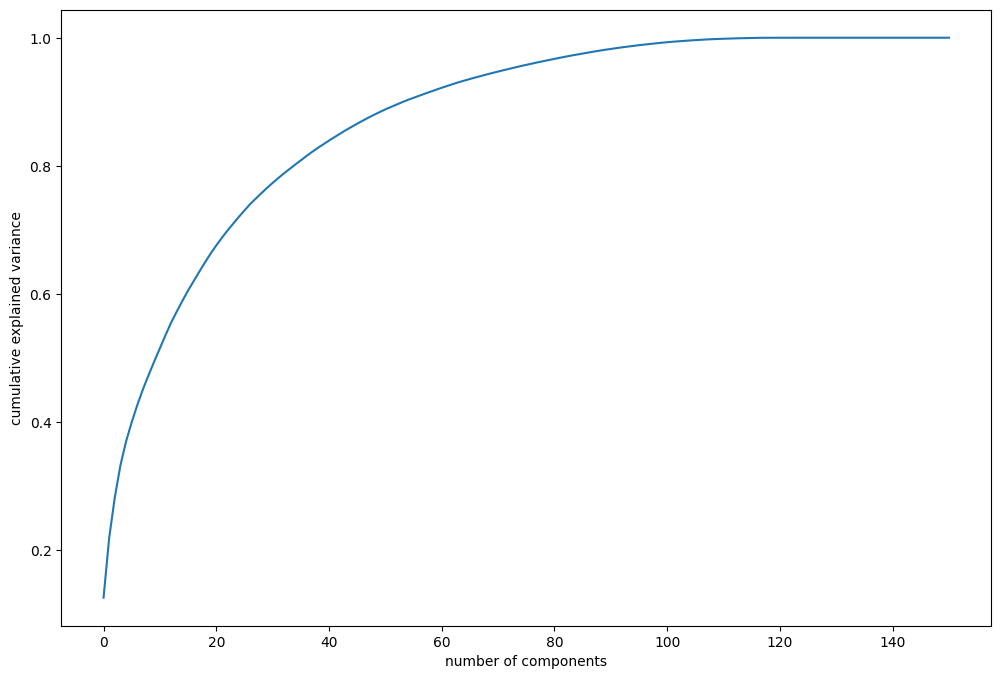

In [39]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [40]:
#pick the number of components explaining max variance
pca_X= IncrementalPCA(n_components=70)

df_train_pca_X = pca_X.fit_transform(X_train)
print(df_train_pca_X.shape)
df_test_pca_X = pca_X.transform(X_test)
print(df_test_pca_X.shape)

(48999, 70)
(21000, 70)


## Logistic Regression with PCA data

In [43]:
#Run the model using the selected variables
LR = LogisticRegression(class_weight='balanced')
LR.fit(df_train_pca_X, y_train)

LogisticRegression(class_weight='balanced')

In [45]:
#Predicted probabilities
y_pred_train = LR.predict(df_train_pca_X)

#Printing results
print("Train data results")
print('-'*80, '\n');
print("Accuracy Score:",accuracy_score(y_train,y_pred_train))
print('-'*80, '\n');
print("Classification Report:")
print(classification_report(y_train, y_pred_train))
print('-'*80, '\n');
print("Confusion Matrix:")
print(confusion_matrix(y_train,y_pred_train))
print('-'*80, '\n');
print("roc_auc_score: {:2.2}".format(metrics.roc_auc_score(y_train, y_pred_train)))
y_pred_train_prob = LR.predict_proba(df_train_pca_X)

Train data results
-------------------------------------------------------------------------------- 

Accuracy Score: 0.7851792893732525
-------------------------------------------------------------------------------- 

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.78      0.87     44022
           1       0.30      0.85      0.45      4977

    accuracy                           0.79     48999
   macro avg       0.64      0.81      0.66     48999
weighted avg       0.91      0.79      0.82     48999

-------------------------------------------------------------------------------- 

Confusion Matrix:
[[34241  9781]
 [  745  4232]]
-------------------------------------------------------------------------------- 

roc_auc_score: 0.81


In [47]:
#Predicted probabilities
y_pred_test = LR.predict(df_test_pca_X)

#Printing results
print("Test data results");
print('-'*80, '\n');
print("Accuracy Score:", accuracy_score(y_test,y_pred_test))
print('-'*80, '\n');
print("Classification Report:")
print(classification_report(y_test, y_pred_test))
print('-'*80, '\n');
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred_test))
print('-'*80, '\n');
print("roc_auc_score: {:2.2}".format(metrics.roc_auc_score(y_test, y_pred_test)))
y_pred_test_prob = LR.predict_proba(df_test_pca_X)

Test data results
-------------------------------------------------------------------------------- 

Accuracy Score: 0.7881904761904762
-------------------------------------------------------------------------------- 

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.78      0.87     18845
           1       0.31      0.87      0.46      2155

    accuracy                           0.79     21000
   macro avg       0.65      0.83      0.66     21000
weighted avg       0.91      0.79      0.83     21000

-------------------------------------------------------------------------------- 

Confusion Matrix:
[[14670  4175]
 [  273  1882]]
-------------------------------------------------------------------------------- 

roc_auc_score: 0.83


## Trying Random Forest without PCA Data

In [48]:
# Running the random forest with default parameters.
rfc = RandomForestClassifier( random_state=42,n_jobs=-1,
                             class_weight='balanced_subsample',                             
                            )

#fit
rfc.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced_subsample', n_jobs=-1,
                       random_state=42)

In [50]:
predictions_train = rfc.predict(X_train)
print ("Train data results")
print('-'*80, '\n');
print("Accuracy Score:", accuracy_score(y_train, predictions_train))
print('-'*80, '\n');
print("Classification Report:")
print(classification_report(y_train, predictions_train))
print('-'*80, '\n');
print("Confusion Matrix:")
print(confusion_matrix(y_train, predictions_train))

Train data results
-------------------------------------------------------------------------------- 

Accuracy Score: 0.9999795914202331
-------------------------------------------------------------------------------- 

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     44022
           1       1.00      1.00      1.00      4977

    accuracy                           1.00     48999
   macro avg       1.00      1.00      1.00     48999
weighted avg       1.00      1.00      1.00     48999

-------------------------------------------------------------------------------- 

Confusion Matrix:
[[44022     0]
 [    1  4976]]


In [51]:
print ("Test data results")
print('-'*80, '\n');
predictions_test = rfc.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, predictions_test))
print('-'*80, '\n');
print("Classification Report:")
print(classification_report(y_test, predictions_test))
print('-'*80, '\n');
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions_test))

Test data results
-------------------------------------------------------------------------------- 

Accuracy Score: 0.9408095238095238
-------------------------------------------------------------------------------- 

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     18845
           1       0.79      0.57      0.67      2155

    accuracy                           0.94     21000
   macro avg       0.87      0.78      0.82     21000
weighted avg       0.94      0.94      0.94     21000

-------------------------------------------------------------------------------- 

Confusion Matrix:
[[18521   324]
 [  919  1236]]


### Random forest hyper parameter tuning

In [52]:
params = {
    'max_depth': [10,20,30],
    'min_samples_leaf': [1,2,5,10],
    'min_samples_split': [2,5,10]
}

strat_cv = StratifiedKFold( n_splits=4, shuffle=True, random_state=42 )

grid_search_rfc = GridSearchCV(
                    estimator = RandomForestClassifier(class_weight='balanced_subsample', random_state=42),
                    param_grid = params,
                    scoring = 'accuracy',
                    cv = strat_cv,
                    n_jobs=-1, verbose=3
                    )
grid_search_rfc.fit(X_train, y_train)

Fitting 4 folds for each of 36 candidates, totalling 144 fits


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(class_weight='balanced_subsample',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy', verbose=3)

In [53]:
print(grid_search_rfc.best_estimator_)


RandomForestClassifier(class_weight='balanced_subsample', max_depth=30,
                       min_samples_leaf=2, random_state=42)


In [54]:
grid_search_rfc.cv_results_

{'mean_fit_time': array([17.22715604, 17.1388213 , 18.01765615, 18.51703471, 18.79124284,
        18.23699522, 18.38741863, 18.61168754, 18.50608677, 18.93359143,
        18.95743775, 18.83990574, 27.99906456, 28.19475245, 27.68229818,
        28.49815291, 28.32124013, 28.12363917, 27.52687562, 27.86014563,
        27.93362635, 27.29369777, 27.87387121, 28.0827865 , 30.93727493,
        30.9539181 , 31.8207466 , 30.44875538, 30.70458239, 31.09217286,
        29.56544501, 29.66168815, 29.70056349, 28.40527749, 28.22828692,
        27.26944476]),
 'std_fit_time': array([0.17789684, 0.15561313, 0.28644869, 0.30190462, 0.14014596,
        0.11311484, 0.23338908, 0.32648203, 0.30443929, 0.24247561,
        0.36625512, 0.19346684, 0.35380849, 0.4145956 , 0.49396442,
        0.46390256, 0.34566864, 0.55100721, 0.1292802 , 0.25622568,
        0.20598551, 0.49066099, 0.68600833, 0.71677832, 0.03791028,
        0.4957785 , 0.68914813, 0.20519264, 0.44721941, 0.57622017,
        0.33952694, 0.164

In [55]:
grid_search_rfc.best_score_

0.942080511362027

In [56]:
grid_search_rfc.best_params_

{'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 2}

In [57]:
rfc_best = RandomForestClassifier( random_state=42,n_jobs=-1 ,
                                  max_depth=30 ,
                                  min_samples_leaf=2,
                                  min_samples_split=2,
                                  class_weight='balanced_subsample'                           
                           )
rfc_best.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced_subsample', max_depth=30,
                       min_samples_leaf=2, n_jobs=-1, random_state=42)

In [58]:
predictions_rfc_train = rfc_best.predict(X_train)
print ("Train data results")
print('-'*80, '\n');
print("Accuracy Score:", accuracy_score(y_train, predictions_rfc_train))
print('-'*80, '\n');
print("Classification Report:")
print(classification_report(y_train, predictions_rfc_train))
print('-'*80, '\n');
print("Confusion Matrix:")
print(confusion_matrix(y_train, predictions_rfc_train))
predictions_rfc_train_prob = rfc_best.predict_proba(X_train)

Train data results
-------------------------------------------------------------------------------- 

Accuracy Score: 0.9893875385211943
-------------------------------------------------------------------------------- 

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     44022
           1       0.91      1.00      0.95      4977

    accuracy                           0.99     48999
   macro avg       0.95      0.99      0.97     48999
weighted avg       0.99      0.99      0.99     48999

-------------------------------------------------------------------------------- 

Confusion Matrix:
[[43504   518]
 [    2  4975]]


In [59]:
print ("Test data results")
print('-'*80, '\n');
predictions_rfc_test = rfc_best.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, predictions_rfc_test))
print('-'*80, '\n');
print("Classification Report:")
print(classification_report(y_test, predictions_rfc_test))
print('-'*80, '\n');
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions_rfc_test))
print("roc_auc_score: {:2.2}".format(metrics.roc_auc_score(y_test, predictions_rfc_test)))
predictions_rfc_test_prob = rfc_best.predict_proba(X_test)

Test data results
-------------------------------------------------------------------------------- 

Accuracy Score: 0.9418571428571428
-------------------------------------------------------------------------------- 

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     18845
           1       0.76      0.63      0.69      2155

    accuracy                           0.94     21000
   macro avg       0.86      0.80      0.83     21000
weighted avg       0.94      0.94      0.94     21000

-------------------------------------------------------------------------------- 

Confusion Matrix:
[[18422   423]
 [  798  1357]]
roc_auc_score: 0.8


In [60]:
importances = rfc_best.feature_importances_
col_names =  X.columns

RF_feature_importance = pd.DataFrame(sorted(zip(importances, list(col_names)), reverse=True),columns=['colName','value'])
RF_feature_importance.head(15)

,colName,value
0,0.067259,loc_ic_mou_8
1,0.061166,total_ic_mou_8
2,0.058301,loc_ic_t2m_mou_8
3,0.047044,loc_og_mou_8
4,0.044673,loc_ic_t2t_mou_8
5,0.041051,total_og_mou_8
6,0.033508,last_day_rch_amt_8
7,0.032652,loc_og_t2m_mou_8
8,0.027360,loc_og_t2t_mou_8
9,0.027324,roam_og_mou_8


## Adaboost Classifier

In [61]:
ada=AdaBoostClassifier()
ada.fit(X_train, y_train)

AdaBoostClassifier()

In [62]:
predictions_ada_train = ada.predict(X_train)
print ("Train data results")
print('-'*80, '\n');
print("Accuracy Score:", accuracy_score(y_train, predictions_ada_train))
print('-'*80, '\n');
print("Classification Report:")
print(classification_report(y_train, predictions_ada_train))
print('-'*80, '\n');
print("Confusion Matrix:")
print(confusion_matrix(y_train, predictions_ada_train))

Train data results
-------------------------------------------------------------------------------- 

Accuracy Score: 0.9399375497459131
-------------------------------------------------------------------------------- 

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     44022
           1       0.75      0.61      0.67      4977

    accuracy                           0.94     48999
   macro avg       0.86      0.79      0.82     48999
weighted avg       0.94      0.94      0.94     48999

-------------------------------------------------------------------------------- 

Confusion Matrix:
[[43039   983]
 [ 1960  3017]]


In [63]:
print ("Test data results")
print('-'*80, '\n');
predictions_ada_test = ada.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, predictions_ada_test))
print('-'*80, '\n');
print("Classification Report:")
print(classification_report(y_test, predictions_ada_test))
print('-'*80, '\n');
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions_ada_test))
print("roc_auc_score: {:2.2}".format(metrics.roc_auc_score(y_test, predictions_ada_test)))

Test data results
-------------------------------------------------------------------------------- 

Accuracy Score: 0.939047619047619
-------------------------------------------------------------------------------- 

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     18845
           1       0.75      0.61      0.67      2155

    accuracy                           0.94     21000
   macro avg       0.85      0.79      0.82     21000
weighted avg       0.94      0.94      0.94     21000

-------------------------------------------------------------------------------- 

Confusion Matrix:
[[18402   443]
 [  837  1318]]
roc_auc_score: 0.79


## GBM Boost

In [64]:
!pip install lightgbm

In [65]:
import lightgbm as lgb

In [66]:
params = {
    'max_depth': [5,10,15,20,25,30],
   'n_estimators':[10,15,20,25,30]
}

gbmc =  lgb.LGBMClassifier(random_state=42)
grid_search_gbm = GridSearchCV(estimator=gbmc,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=3, scoring="accuracy")
grid_search_gbm.fit(X_train, y_train)

Fitting 4 folds for each of 30 candidates, totalling 120 fits


GridSearchCV(cv=4, estimator=LGBMClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15, 20, 25, 30],
                         'n_estimators': [10, 15, 20, 25, 30]},
             scoring='accuracy', verbose=3)

In [67]:
grid_search_gbm.best_params_

{'max_depth': 10, 'n_estimators': 30}

In [70]:
gbm=lgb.LGBMClassifier(random_state=42,max_depth=10,n_estimators=30)
gbm.fit(X_train, y_train)

LGBMClassifier(max_depth=10, n_estimators=30, random_state=42)

In [71]:
print ("Test data results")
print('-'*80, '\n');
predictions_gbm_test = gbm.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, predictions_gbm_test))
print('-'*80, '\n');
print("Classification Report:")
print(classification_report(y_test, predictions_gbm_test))
print('-'*80, '\n');
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions_gbm_test))
print("roc_auc_score: {:2.2}".format(metrics.roc_auc_score(y_test, predictions_gbm_test)))

Test data results
-------------------------------------------------------------------------------- 

Accuracy Score: 0.9426666666666667
-------------------------------------------------------------------------------- 

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     18845
           1       0.76      0.65      0.70      2155

    accuracy                           0.94     21000
   macro avg       0.86      0.81      0.83     21000
weighted avg       0.94      0.94      0.94     21000

-------------------------------------------------------------------------------- 

Confusion Matrix:
[[18406   439]
 [  765  1390]]
roc_auc_score: 0.81


In [72]:
importances = gbm.feature_importances_
col_names =  X.columns

RF_feature_importance = pd.DataFrame(sorted(zip(importances, list(col_names)), reverse=True),columns=['colName','value'])
RF_feature_importance.head(15)

,colName,value
0,52,last_day_rch_amt_8
1,45,loc_ic_mou_8
2,40,aon
3,36,roam_og_mou_8
4,35,spl_ic_mou_8
5,30,total_ic_mou_8
6,26,total_rech_num_7
7,26,total_ic_mou_7
8,23,total_rech_amt_8
9,23,loc_ic_mou_7


## Trying with XG Boost

In [73]:
from xgboost import XGBClassifier

#Running the random forest with default parameters.
xgb = XGBClassifier(random_state=42)

#fit
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

In [74]:
predictions_train = xgb.predict(X_train)
print ("Train data results")
print('-'*80, '\n');
print("accuracy score:", accuracy_score(y_train, predictions_train))
print('-'*80, '\n');
print("classification report:")
print(classification_report(y_train, predictions_train))
print('-'*80, '\n');
print("confusion matrix:")
print(confusion_matrix(y_train, predictions_train))

Train data results
-------------------------------------------------------------------------------- 

accuracy score: 0.9781628196493806
-------------------------------------------------------------------------------- 

classification report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     44022
           1       0.91      0.87      0.89      4977

    accuracy                           0.98     48999
   macro avg       0.95      0.93      0.94     48999
weighted avg       0.98      0.98      0.98     48999

-------------------------------------------------------------------------------- 

confusion matrix:
[[43599   423]
 [  647  4330]]


In [75]:
print ("Test data results")
print('-'*80, '\n');
predictions_test = xgb.predict(X_test)
print("accuracy score:", accuracy_score(y_test, predictions_test))
print('-'*80, '\n');
print("classification report:")
print(classification_report(y_test, predictions_test))
print('-'*80, '\n');
print("confusion matrix:")
print(confusion_matrix(y_test, predictions_test))

Test data results
-------------------------------------------------------------------------------- 

accuracy score: 0.9407142857142857
-------------------------------------------------------------------------------- 

classification report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     18845
           1       0.75      0.64      0.69      2155

    accuracy                           0.94     21000
   macro avg       0.85      0.81      0.83     21000
weighted avg       0.94      0.94      0.94     21000

-------------------------------------------------------------------------------- 

confusion matrix:
[[18382   463]
 [  782  1373]]


In [76]:
params = {
    'max_depth': [3,4,5],
   'n_estimators':[50,100,150]
}

xgbc =  XGBClassifier(random_state=42,scale_pos_weight=1)
grid_search_xgb = GridSearchCV(estimator=xgbc,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=3, scoring="accuracy")
grid_search_xgb.fit(X_train, y_train)

Fitting 4 folds for each of 9 candidates, totalling 36 fits


GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=42, reg_alpha=None,
                                     reg_lambda=None, ...),
             n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy', verbose=3)

In [77]:
grid_search_xgb.best_params_

{'max_depth': 3, 'n_estimators': 50}

In [78]:
#Running the random forest with default parameters.
xgb_best = XGBClassifier(random_state=42,max_depth = 3,n_estimators=50,n_jobs=-1)

#fit
xgb_best.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=50,
              n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

In [79]:
importances = xgb_best.feature_importances_
col_names =  X.columns

RF_feature_importance = pd.DataFrame(sorted(zip(importances, list(col_names)), reverse=True),columns=['colName','value'])
RF_feature_importance.head(15)

,colName,value
0,0.400400,total_ic_mou_8
1,0.094469,loc_ic_mou_8
2,0.060382,fb_user_8
3,0.022077,roam_og_mou_8
4,0.019224,arpu_8
5,0.016366,offnet_mou_8
6,0.013953,last_day_rch_amt_8
7,0.013541,loc_ic_mou_7
8,0.012933,loc_og_mou_8
9,0.012478,av_rech_amt_data_8


In [80]:
predictions_train_xgb = xgb_best.predict(X_train)
print ("Train data results")
print('-'*80, '\n');
print("accuracy score:", accuracy_score(y_train, predictions_train_xgb))
print('-'*80, '\n');
print("classification report:")
print(classification_report(y_train, predictions_train_xgb))
print('-'*80, '\n');
print("confusion matrix:")
print(confusion_matrix(y_train, predictions_train_xgb))
predictions_train_xgb_prob=xgb_best.predict_proba(X_train)

Train data results
-------------------------------------------------------------------------------- 

accuracy score: 0.9438968142206984
-------------------------------------------------------------------------------- 

classification report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     44022
           1       0.77      0.64      0.70      4977

    accuracy                           0.94     48999
   macro avg       0.86      0.81      0.83     48999
weighted avg       0.94      0.94      0.94     48999

-------------------------------------------------------------------------------- 

confusion matrix:
[[43047   975]
 [ 1774  3203]]


In [81]:
print ("Test data results")
print('-'*80, '\n');
predictions_test_xgb = xgb_best.predict(X_test)
print("accuracy score:", accuracy_score(y_test, predictions_test_xgb))
print('-'*80, '\n');
print("classification report:")
print(classification_report(y_test, predictions_test_xgb))
print('-'*80, '\n');
print("confusion matrix:")
print(confusion_matrix(y_test, predictions_test_xgb))
predictions_test_xgb_prob=xgb_best.predict_proba(X_test)

Test data results
-------------------------------------------------------------------------------- 

accuracy score: 0.9428095238095238
-------------------------------------------------------------------------------- 

classification report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     18845
           1       0.76      0.64      0.70      2155

    accuracy                           0.94     21000
   macro avg       0.86      0.81      0.83     21000
weighted avg       0.94      0.94      0.94     21000

-------------------------------------------------------------------------------- 

confusion matrix:
[[18412   433]
 [  768  1387]]


### Evaluating Test Data

In [82]:
X_test.shape

(21000, 151)

In [83]:
test_data = pd.read_csv("test.csv")

print('Dataframe Shape: ', test_data.shape); print('-'*80, '\n');
test_data.head(5)

Dataframe Shape:  (30000, 171)
-------------------------------------------------------------------------------- 



,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,64.445,31.78,20.23,23.11,60.16,32.16,34.83,0.00,0.00,0.00,0.00,0.00,0.00,24.88,20.23,21.06,18.13,10.89,8.36,0.00,13.58,0.00,0.0,0.00,0.03,43.01,44.71,29.43,6.90,0.00,2.05,42.03,7.68,26.43,0.0,0.0,0.0,0.0,0.0,0.0,48.93,7.68,28.48,0.0,0.0,0.0,0.00,0.00,0.03,0.0,0.0,0.0,91.94,52.39,57.94,30.33,37.56,21.98,10.21,4.59,9.53,0.26,0.00,0.00,40.81,42.16,31.51,0.00,0.00,0.00,0.36,1.04,4.34,0.0,0.0,0.00,0.0,0.0,0.0,0.36,1.04,4.34,41.73,43.56,36.26,0.54,0.34,0.39,0.00,0.00,0.00,0.0,0.0,0.00,5,5,4,103,90,60,50,30,30,6/21/2014,7/26/2014,8/24/2014,30,30,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,360.868,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,0.00,0.00,75.51,41.21,19.84,473.61,598.08,377.26,0.73,0.00,0.00,0.0,0.00,0.00,549.86,639.29,397.11,0.00,0.00,0.00,0.00,23.76,17.68,0.0,0.0,0.0,0.0,0.0,0.0,0.00,23.76,17.68,0.0,0.0,0.8,0.00,0.00,0.00,0.0,0.0,0.0,549.86,663.06,415.59,19.99,26.95,2.61,160.19,122.29,184.81,1.49,0.00,0.00,181.69,149.24,187.43,0.00,0.00,0.00,0.00,12.51,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,12.51,0.00,296.33,339.64,281.66,0.00,0.00,0.00,114.63,177.88,94.23,0.0,0.0,0.00,5,4,5,500,500,500,250,250,250,6/19/2014,7/16/2014,8/24/2014,250,0,0,NaN,NaN,Na

In [84]:

test_data.drop(data_unique_count_is_one, axis=1, inplace=True)

test_data.shape

(30000, 158)

In [85]:

#test_data.drop(high_missing_cols.index, axis=1, inplace=True)
#test_data.shape

In [86]:
test_data.drop(date_vars, axis=1, inplace=True)
test_data.shape

(30000, 152)

In [87]:
id=test_data.id

In [88]:
test_data.drop("id", axis=1, inplace=True)
test_data.shape

(30000, 151)

In [89]:
missing_values = pd.DataFrame((test_data.isnull().sum()/len(test_data))*100).reset_index().rename(columns = {'index': 'feature', 0: 'Missing%'}).sort_values('Missing%',ascending = False)
missing_values.head(10)

,feature,Missing%
123,arpu_3g_6,74.716667
126,arpu_2g_6,74.716667
144,fb_user_6,74.716667
102,total_rech_data_6,74.716667
129,night_pck_user_6,74.716667
105,max_rech_data_6,74.716667
108,count_rech_2g_6,74.716667
114,av_rech_amt_data_6,74.716667
111,count_rech_3g_6,74.716667
112,count_rech_3g_7,74.313333


In [90]:
test_data.shape

(30000, 151)

In [91]:
test_data.head(5)

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,91.882,65.330,64.445,31.78,20.23,23.11,60.16,32.16,34.83,0.00,0.00,0.00,0.00,0.00,0.00,24.88,20.23,21.06,18.13,10.89,8.36,0.00,13.58,0.00,0.0,0.00,0.03,43.01,44.71,29.43,6.90,0.00,2.05,42.03,7.68,26.43,0.0,0.0,0.0,48.93,7.68,28.48,0.0,0.0,0.0,0.00,0.00,0.03,0.0,0.0,0.0,91.94,52.39,57.94,30.33,37.56,21.98,10.21,4.59,9.53,0.26,0.00,0.00,40.81,42.16,31.51,0.00,0.00,0.00,0.36,1.04,4.34,0.0,0.0,0.00,0.36,1.04,4.34,41.73,43.56,36.26,0.54,0.34,0.39,0.00,0.00,0.00,0.0,0.0,0.00,5,5,4,103,90,60,50,30,30,30,30,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,414.168,515.568,360.868,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,0.00,0.00,75.51,41.21,19.84,473.61,598.08,377.26,0.73,0.00,0.00,0.0,0.00,0.00,549.86,639.29,397.11,0.00,0.00,0.00,0.00,23.76,17.68,0.0,0.0,0.0,0.00,23.76,17.68,0.0,0.0,0.8,0.00,0.00,0.00,0.0,0.0,0.0,549.86,663.06,415.59,19.99,26.95,2.61,160.19,122.29,184.81,1.49,0.00,0.00,181.69,149.24,187.43,0.00,0.00,0.00,0.00,12.51,0.00,0.0,0.0,0.00,0.00,12.51,0.00,296.33,339.64,281.66,0.00,0.00,0.00,114.63,177.88,94.23,0.0,0.0,0.00,5,4,5,500,500,500,250,250,250,250,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2533,0.00,0.00,0.00
2,329.844,434.884,746.239,7.54,7.86,8.40,16.98,45.81,45.04,22.81,103.38,26.08,24.53,53.68,54.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.

In [92]:
if zero_impute==0:
    orig_cols=test_data.columns
    test_data = pd.DataFrame(simple_imtr.transform(test_data))
    test_data.columns=orig_cols
else :
    test_data=test_data.fillna(0)

In [93]:
cols=test_data.columns
test_data = pd.DataFrame(scaler.transform(test_data))
test_data.columns=cols


In [94]:
predictions_test=rfc_best.predict(test_data)

In [95]:
count_arr = np.bincount(predictions_test)
# Count occurrence of element '1' in numpy array
print('Total occurences of "1" in array: ', count_arr[1])
# Count occurrence of element '0' in numpy array
print('Total occurences of "0" in array: ', count_arr[0])

Total occurences of "1" in array:  2516
Total occurences of "0" in array:  27484


In [96]:
predictions_test_xgb=xgb_best.predict(test_data)

In [97]:
count_arr = np.bincount(predictions_test_xgb)
# Count occurrence of element '1' in numpy array
print('Total occurences of "1" in array: ', count_arr[1])
# Count occurrence of element '0' in numpy array
print('Total occurences of "0" in array: ', count_arr[0])

Total occurences of "1" in array:  2618
Total occurences of "0" in array:  27382


In [98]:
solution_df=pd.DataFrame({'id':id,'churn_probability':predictions_test})

In [99]:
solution_df.head(10)

,id,churn_probability
0,69999,0
1,70000,0
2,70001,1
3,70002,0
4,70003,0
5,70004,1
6,70005,0
7,70006,0
8,70007,0
9,70008,0


In [100]:
solution_df.to_csv('solution_rfc.csv', index=False)

In [101]:
solution_df_xgb=pd.DataFrame({'id':id,'churn_probability':predictions_test_xgb})

In [102]:
solution_df_xgb.head(10)

,id,churn_probability
0,69999,0
1,70000,0
2,70001,1
3,70002,0
4,70003,0
5,70004,1
6,70005,0
7,70006,0
8,70007,0
9,70008,1


In [103]:
solution_df_xgb.to_csv('solution_xgb.csv', index=False)

In [104]:
solution_orig=pd.read_csv("solution.csv")

In [105]:
Y_actual=solution_orig.churn_probability

In [106]:
count_arr = np.bincount(Y_actual)
# Count occurrence of element '1' in numpy array
print('Total occurences of "1" in array: ', count_arr[1])
# Count occurrence of element '0' in numpy array
print('Total occurences of "0" in array: ', count_arr[0])

Total occurences of "1" in array:  3059
Total occurences of "0" in array:  26941


In [107]:
accuracy_score(Y_actual,predictions_test)

0.9447

In [108]:
accuracy_score(Y_actual,predictions_test_xgb)

0.9439666666666666

In [109]:
print(confusion_matrix(Y_actual, predictions_test))

[[26383   558]
 [ 1101  1958]]


In [110]:
print(confusion_matrix(Y_actual, predictions_test_xgb))

[[26321   620]
 [ 1061  1998]]


In [111]:
solution_df.to_csv('Submission.csv', index=False)

In [ ]:
predictions_test_ada=ada.predict(test_data)
accuracy_score(Y_actual,predictions_test_ada)

In [ ]:
predictions_test_gbm=gbm.predict(test_data)
accuracy_score(Y_actual,predictions_test_gbm)

In [ ]:
solution_df_gbm=pd.DataFrame({'id':id,'churn_probability':predictions_test_gbm})
solution_df_gbm.to_csv('Submission_gbm.csv', index=False)

In [112]:
solution_df_gbm.to_csv('Submission.csv', index=False)

NameError: name 'solution_df_gbm' is not defined